In this notebook we showcase the usage of FedCG (A secure federalized kernel least square learning algorithm) as shown in Algorithm 1 of the paper. 

First we explore the datasets that we used for our tests (Table 1 from the paper), then we show how to use the class FedCG, then run the simulations described in Section 3 (Experimental results). 



In [3]:
# Import necessary libraries and modules
import numpy as np
import pdb
from sklearn.metrics import accuracy_score


# importin
# scripts for auxiliary functions
import sys
import os
sys.path.append('..')
sys.path.append('./py_scripts')


from py_scripts.kernel import Kernel
from py_scripts.dataset_handler import *
from py_scripts.federated_functions import FedCG 
from py_scripts.simulation import model_simulation, nys_simulation, nys_simulation_surface

In [4]:
# INITIALISATION
# Define your data, parameters, and model initialization
# kernel type can be: 0 for linear, 1 for RBF, 2 for polynomial, 3 for random kernel, 4 wu kernel
# sigma: width/variance of the rbf kernel, default is None
# polydegree: degree of the polynomial kernel, default is None
# binary: 1 for yes, default is None


kernel_params = Kernel(kernel_type=1, kernel_sigma = 1, poly_degree = None, binary = None) 
nyst_points = 50    # Define the number of Nystrom points
lam = 1e-6  # Define the regularization parameter - è a 1e-6 per tutti tranne sonar e ionosphere
Nb = 10             # Define the number of batches or hospitals
toll = 1e-3      # Define the tolerance value - a 1e-3 per tutti meno sonar e ionosphere

# Explore datasets


### Toy dataset

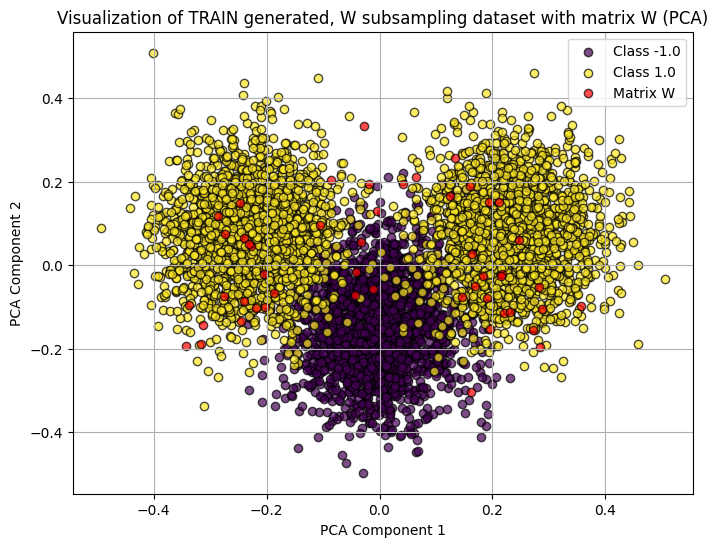

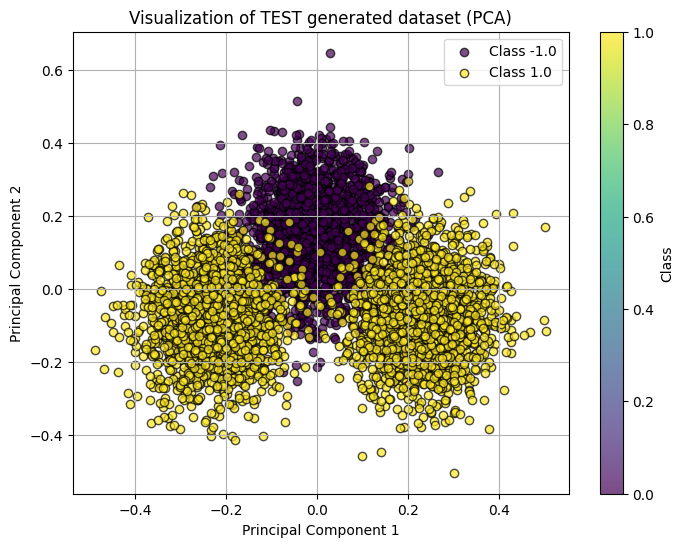

<Figure size 640x480 with 0 Axes>

In [5]:
[X_train, y_train, X_test, y_test, W ]=load_random_gen_dataset( N=2000, feat=3, seed=0, nystr_pt=nyst_points, nystr_method='subsampling')

visualize_dataset_pca_with_W(X_train, y_train, W, 'TRAIN generated, W subsampling')
visualize_dataset_pca(X_test, y_test,'TEST generated')

### Iris

In [ ]:
[X_train, y_train, X_test, y_test, W ]= load_iris_dataset(seed=0, nystr_pt=50, nystr_method='subsampling')

visualize_dataset_pca_with_W(X_train, y_train, W, 'TRAIN Iris, W subsampling')
visualize_dataset_pca(X_test, y_test,'TEST Iris')

### Ionosphere

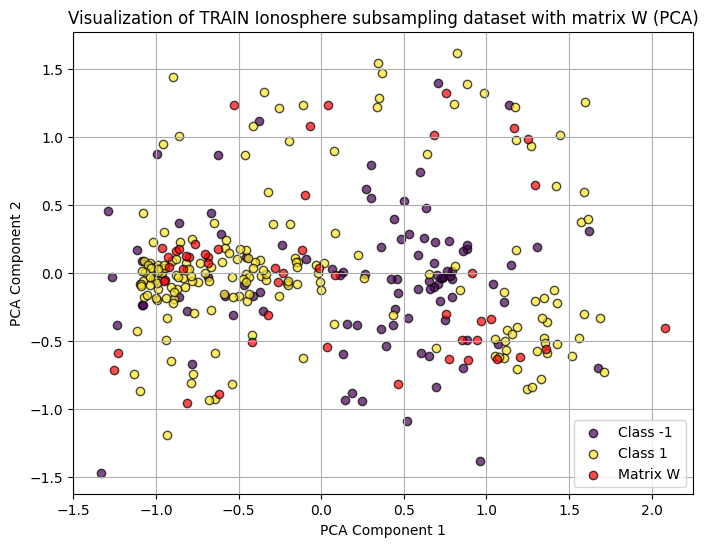

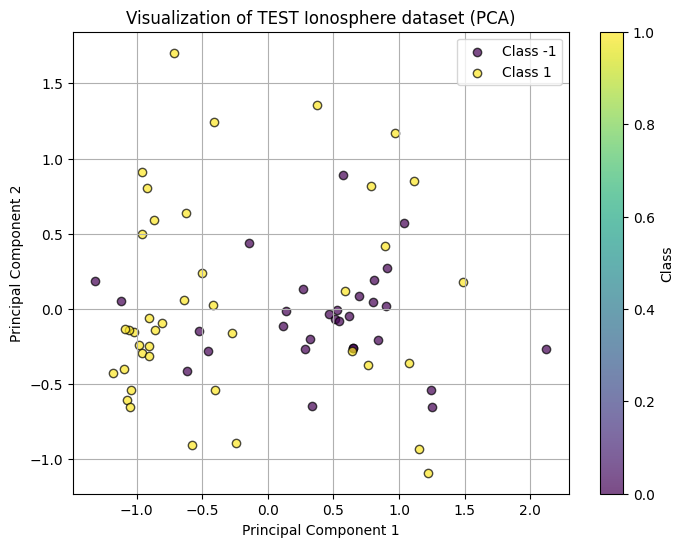

<Figure size 640x480 with 0 Axes>

In [6]:
[X_train, y_train, X_test, y_test, W ]= load_ionosphere_dataset(seed=0, nystr_pt=50, nystr_method='subsampling')

visualize_dataset_pca_with_W(X_train, y_train, W, 'TRAIN Ionosphere subsampling')
visualize_dataset_pca(X_test, y_test,'TEST Ionosphere')

### Sonar

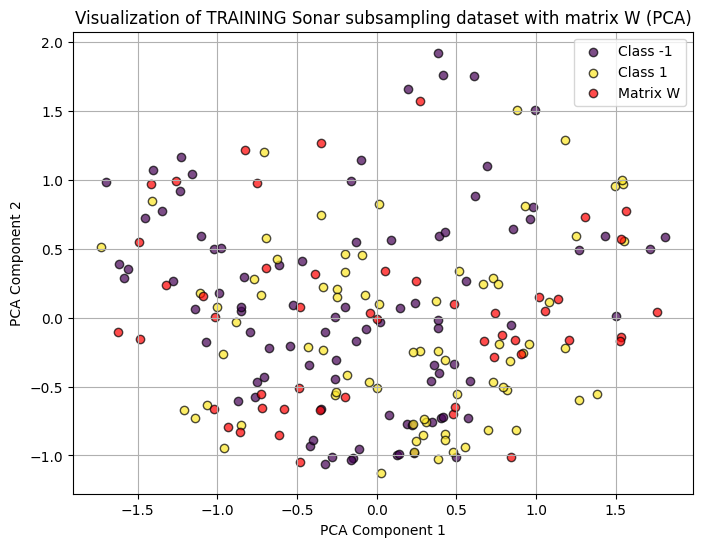

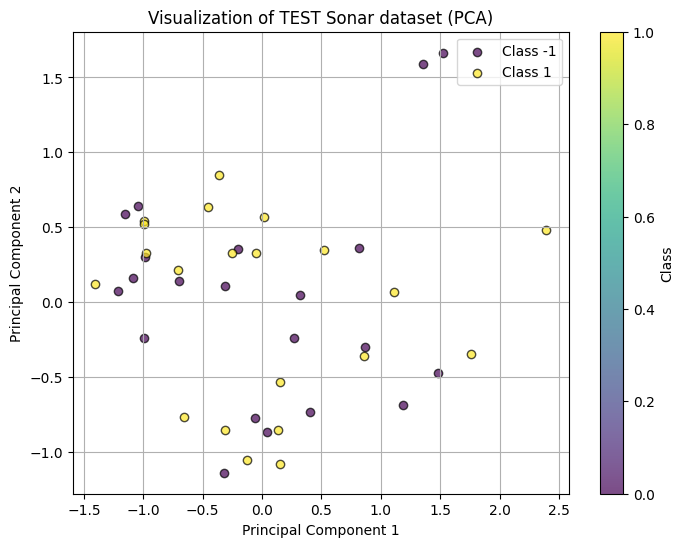

<Figure size 640x480 with 0 Axes>

In [8]:
[X_train, y_train, X_test, y_test, W ]= load_sonar_dataset(seed=0, nystr_pt=50, nystr_method='subsampling')

visualize_dataset_pca_with_W(X_train, y_train, W, 'TRAINING Sonar subsampling')
visualize_dataset_pca(X_test, y_test,'TEST Sonar')

### BC Wisconsin

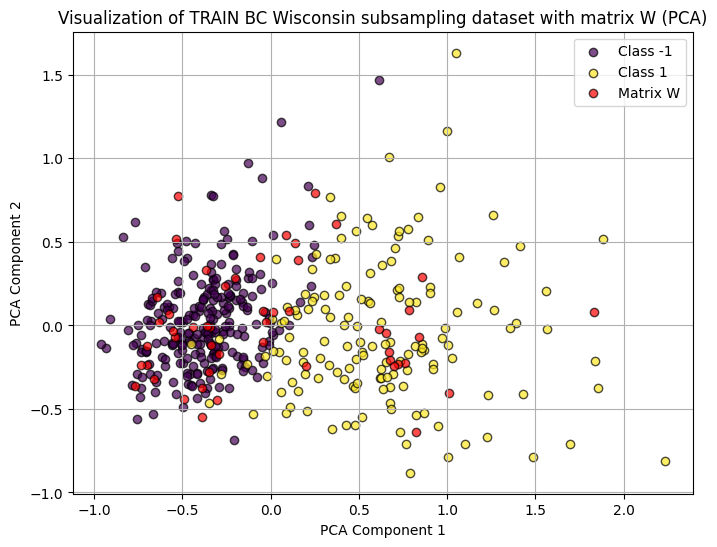

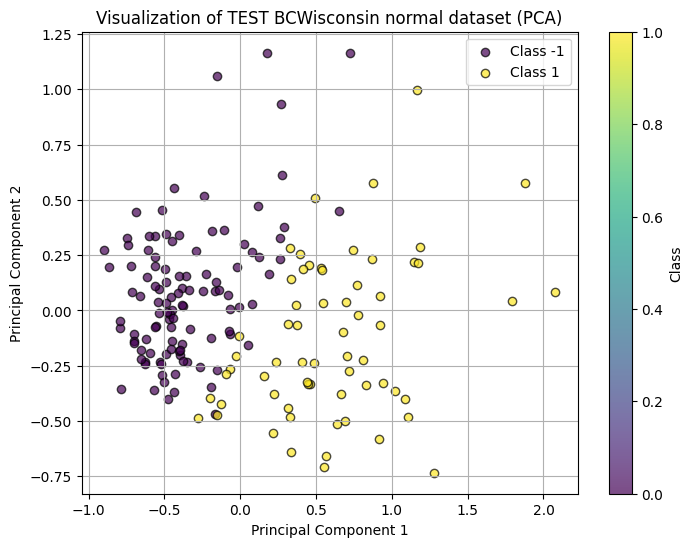

<Figure size 640x480 with 0 Axes>

In [7]:
[X_train, y_train, X_test, y_test, W ]= load_bc_dataset(seed=0, nystr_pt=50, nystr_method='subsampling')

visualize_dataset_pca_with_W(X_train, y_train, W, 'TRAIN BC Wisconsin subsampling')
visualize_dataset_pca(X_test, y_test,'TEST BCWisconsin normal')

### Wine

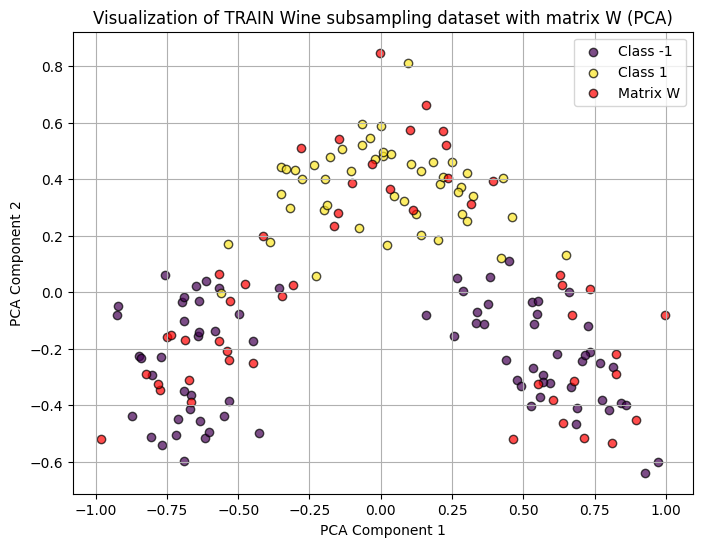

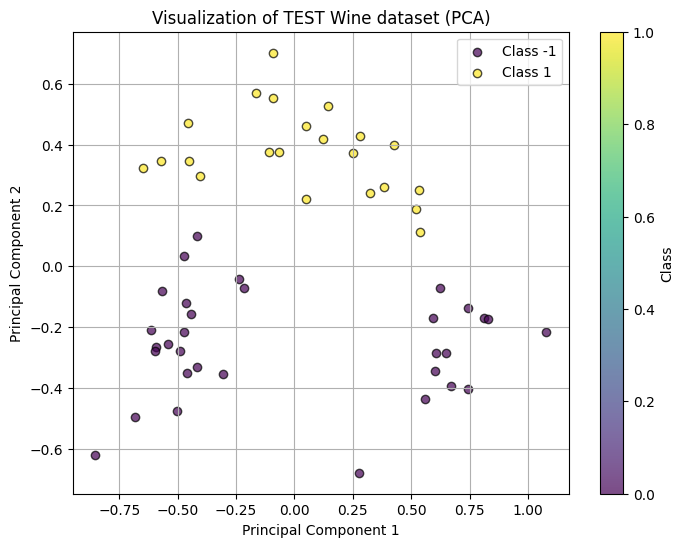

<Figure size 640x480 with 0 Axes>

In [9]:
[X_train, y_train, X_test, y_test, W ]= load_wine_dataset(seed=0, nystr_pt=50, nystr_method='subsampling')

visualize_dataset_pca_with_W(X_train, y_train, W, 'TRAIN Wine subsampling')
visualize_dataset_pca(X_test, y_test,'TEST Wine')

# Using the class - Toy dataset

In [ ]:
[X_train, y_train, X_test, y_test, W ]=load_random_gen_dataset( N=2000, feat=3, seed=0, nystr_pt=nyst_points, nystr_method='uniform')
#visualize_dataset_pca_with_W(X_train, y_train, W, "Generated_ds_W_uniform")

# Initialise the FedCG object
fedcg_model = FedCG(kernel_params, nyst_points, lam, Nb, toll)
# We also initialise a CenCG centralised model for comparison
cencg_model = FedCG(kernel_params, nyst_points, lam, 1, toll)

#TRAINING
localResidue, federated_accuracy, test_accuracy, elapsed, alpha = fedcg_model.fit(X_train, y_train, X_test, y_test, W=W, alpha_init=None)


In [ ]:
central_localResidue, central_federated_accuracy, cen_time, central_test_accuracy , central_alpha = cencg_model.fit(X_train, y_train, X_test, y_test, W=W, alpha_init=None)

In [ ]:
#PREDICTIONS
predictions = fedcg_model.predict(X_test)
transformed_predictions = np.sign(predictions)
print("Unique values in predictions: ", np.unique(transformed_predictions))  # Display unique values in transformed_predictions

# Compute accuracy
accuracy = accuracy_score(y_test, transformed_predictions)
print(f"Accuracy of the federated model on the test set: {accuracy}")

In [ ]:
# CENTRALISED PREDICTIONS
cen_predictions = cencg_model.predict(X_test)
cen_transformed_predictions = np.sign(cen_predictions)

# Compute accuracy
cen_accuracy = accuracy_score(y_test, cen_transformed_predictions)
print(f"Accuracy of the centralised model on the test set: {cen_accuracy}")

## Testing with actual datasets

### Iris dataset

In [ ]:
[X_iris_train, y_iris_train, X_iris_test, y_iris_test, W_iris ]=load_iris_dataset(nystr_pt=nyst_points, nystr_method='uniform')

# Initialise the FedCG object
fedcg_model_iris = FedCG(kernel_params, nyst_points, lam, Nb, toll)
# We also initialise a CenCG centralised model for comparison
cencg_model_iris = FedCG(kernel_params, nyst_points, lam, 1, toll)

iris_localResidue, iris_federated_accuracy, iris_test_accuracy,exp_time,  iris_alpha = fedcg_model_iris.fit(X_iris_train, y_iris_train, X_iris_test, y_iris_test, W=W_iris, alpha_init=None)


In [ ]:
central_iris_localResidue, cent_iris_federated_accuracy, cent_iris_test_accuracy, cen_ext_time,  central_iris_alpha = cencg_model_iris.fit(X_iris_train, y_iris_train, X_iris_test, y_iris_test, W=W_iris, alpha_init=None)

### Ionosphere dataset

In [ ]:
[X_ionosphere_train, y_ionosphere_train, X_ionosphere_test, y_ionosphere_test, W_ionosphere ]=load_ionosphere_dataset(nystr_pt=nyst_points, nystr_method='uniform')

In [ ]:
# Define the range of values for lambda and toll for grid search
lam_values = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]  # Add more values if needed
toll_values = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]  # Add more values if needed

best_epoch = 0
best_params = {}

for lam in lam_values:
    for toll in toll_values:
        fedcg_model_ionosphere = FedCG(kernel_params, nyst_points, lam, Nb, toll)
        ionosphere_localResidue, ionosphere_federated_accuracy, ionosphere_test_accuracy, ionosphere_elapsed, ionosphere_alpha = fedcg_model_ionosphere.fit(X_ionosphere_train, y_ionosphere_train, X_ionosphere_test, y_ionosphere_test, W=W_ionosphere, alpha_init=None, silent=True)
        stopping_epoch = len(ionosphere_localResidue)
        if stopping_epoch > best_epoch:
            best_epoch = stopping_epoch
            best_params['lambda'] = lam
            best_params['tolerance'] = toll
            best_model = fedcg_model_ionosphere

print("Best stopping epoch:", best_epoch)
print("Best lambda:", best_params['lambda'])
print("Best tolerance:", best_params['tolerance'])


In [ ]:
lam = 1e-6
toll =  1e-3

# Initialise the FedCG object
fedcg_model_ionosphere = FedCG(kernel_params, nyst_points, lam, Nb, toll)
# We also initialise a CenCG centralised model for comparison
cencg_model_ionosphere = FedCG(kernel_params, nyst_points, lam, 1, toll)

ionosphere_localResidue, ionosphere_federated_accuracy, ionosphere_test_accuracy, ionosphere_elapsed, ionosphere_alpha = fedcg_model_ionosphere.fit(X_ionosphere_train, y_ionosphere_train, X_ionosphere_test, y_ionosphere_test, W=W_ionosphere, alpha_init=None)

In [ ]:
#PREDICTIONS
predictions = fedcg_model_ionosphere.predict(X_ionosphere_test)
transformed_predictions = np.sign(predictions)
print("Unique values in predictions: ", np.unique(transformed_predictions))  # Display unique values in transformed_predictions

# Compute accuracy
accuracy = accuracy_score(y_ionosphere_test, transformed_predictions)
print(f"Accuracy of the federated model on the test set: {accuracy}")

In [ ]:
central_ionosphere_localResidue, cent_ionosphere_federated_accuracy, cent_ionosphere_test_accuracy,central_ionosphere_elapsed, central_ionosphere_alpha = cencg_model_ionosphere.fit(X_ionosphere_train, y_ionosphere_train, X_ionosphere_test, y_ionosphere_test, W=W_ionosphere, alpha_init=None)

### Sonar dataset

In [ ]:
[X_sonar_train, y_sonar_train, X_sonar_test, y_sonar_test, W_sonar ]=load_sonar_dataset(nystr_pt=nyst_points, nystr_method='uniform')


In [ ]:
# Define the range of values for lambda and toll for grid search
lam_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]  # Add more values if needed
toll_values = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]  # Add more values if needed

best_epoch = 0
best_params = {}

for lam in lam_values:
    for toll in toll_values:
        fedcg_model_sonar = FedCG(kernel_params, nyst_points, lam, Nb, toll)
        sonar_localResidue, sonar_federated_accuracy, sonar_test_accuracy, sonar_elapsed, sonar_alpha = fedcg_model_sonar.fit(X_sonar_train, y_sonar_train, X_sonar_test, y_sonar_test, W=W_sonar, alpha_init=None, silent=True)
        stopping_epoch = len(sonar_localResidue)
        if stopping_epoch > best_epoch:
            best_epoch = stopping_epoch
            best_params['lambda'] = lam
            best_params['tolerance'] = toll
            best_model = fedcg_model_sonar

print("Best stopping epoch:", best_epoch)
print("Best lambda:", best_params['lambda'])
print("Best tolerance:", best_params['tolerance'])


In [ ]:
lam = 1e-6
toll = 1e-3
fedcg_model_sonar = FedCG(kernel_params, nyst_points, lam, Nb, toll)
cencg_model_sonar = FedCG(kernel_params, nyst_points, lam, 1, toll)

sonar_localResidue, sonar_federated_accuracy, sonar_test_accuracy,sonar_elapsed, sonar_alpha = fedcg_model_sonar.fit(X_sonar_train, y_sonar_train, X_sonar_test, y_sonar_test, W=W_sonar, alpha_init=None)

In [ ]:
#PREDICTIONS
predictions = fedcg_model_sonar.predict(X_sonar_test)
transformed_predictions = np.sign(predictions)
print("Unique values in predictions: ", np.unique(transformed_predictions))  # Display unique values in transformed_predictions

# Compute accuracy
accuracy = accuracy_score(y_sonar_test, transformed_predictions)
print(f"Accuracy of the federated model on the test set: {accuracy}")

In [ ]:
central_sonar_localResidue, cen_sonar_federated_accuracy, cen_sonar_test_accuracy,central_sonar_elapsed, central_sonar_alpha = cencg_model_sonar.fit(X_sonar_train, y_sonar_train, X_sonar_test, y_sonar_test, W=W_sonar, alpha_init=None)

# Simulations
Random initialisation at each run, 10 runs, function `model_simulation` in `py_scripts/simulation.py`.

## Toy dataset

In [ ]:
[X_train, y_train, X_test, y_test, W ]=load_random_gen_dataset( N=2000, feat=3, seed=0, nystr_pt=nyst_points, nystr_method='uniform')

model_simulation('Generated_uniform', 10, X_train, y_train, X_test, y_test, W, kernel_params, nyst_points, lam, Nb, toll)

## Iris dataset


In [ ]:
[X_train, y_train, X_test, y_test, W ]=load_iris_dataset( nystr_pt=nyst_points, nystr_method='uniform')
model_simulation('Iris_uniform', 10, X_train, y_train, X_test, y_test, W, kernel_params, nyst_points, lam, Nb, toll)

## Ionosphere dataset

In [ ]:
lam = 1e-4
toll =  1e-6
[X_train, y_train, X_test, y_test, W ]=load_ionosphere_dataset(nystr_pt=nyst_points, nystr_method='uniform')
model_simulation('Ionosphere_uniform', 10, X_train, y_train, X_test, y_test, W, kernel_params, nyst_points, lam, Nb, toll)

## Sonar dataset

In [ ]:
[X_train, y_train, X_test, y_test, W ]=load_sonar_dataset( nystr_pt=nyst_points, nystr_method='uniform')
lam = 1e-6
toll = 1e-6
model_simulation('Sonar_uniform', 10, X_train, y_train, X_test, y_test, W, kernel_params, nyst_points, lam, Nb, toll)

## Breast cancer

In [ ]:
lam = 1e-6
toll = 1e-3
[X_train, y_train, X_test, y_test, W ]=load_bc_dataset( nystr_pt=nyst_points, nystr_method='uniform')
model_simulation('Breast_cancer_uniform', 10, X_train, y_train, X_test, y_test, W, kernel_params, nyst_points, lam, Nb, toll)

## Wine dataset

In [ ]:
[X_train, y_train, X_test, y_test, W ]=load_wine_dataset( nystr_pt=nyst_points, nystr_method='uniform')
model_simulation('Wine_uniform', 10, X_train, y_train, X_test, y_test, W, kernel_params, nyst_points, lam, Nb, toll)

# Nystrom matrix simulations

Nystrom landmark new initialisation at each run, 10 runs, function `nys_simulation` in `py_scripts/simulation.py`.

In [ ]:
[X_train, y_train, X_test, y_test]=load_random_gen_dataset(N=2000, feat=3, seed=0, nystr_pt=nyst_points, nystr_method='uniform')[:-1]
nys_simulation('Generated', 10, X_train, y_train, X_test, y_test, 'uniform', kernel_params, nyst_points, lam, Nb, toll)


In [ ]:
[X_train, y_train, X_test, y_test]=load_iris_dataset( nystr_pt=nyst_points, nystr_method='uniform')[:-1]
nys_simulation('Iris', 10, X_train, y_train, X_test, y_test, 'uniform', kernel_params, nyst_points, lam, Nb, toll)

In [ ]:
lam = 1e-4
toll =  1e-6
[X_train, y_train, X_test, y_test ]=load_ionosphere_dataset(nystr_pt=nyst_points, nystr_method='uniform')[:-1]
nys_simulation('Ionosphere', 10, X_train, y_train, X_test, y_test, 'uniform', kernel_params, nyst_points, lam, Nb, toll)

In [ ]:
lam = 1e-6
toll =  1e-4
[X_train, y_train, X_test, y_test ]=load_sonar_dataset( nystr_pt=nyst_points, nystr_method='uniform')[:-1]
nys_simulation('Sonar', 10, X_train, y_train, X_test, y_test, 'uniform', kernel_params, nyst_points, lam, Nb, toll)

In [ ]:
[X_train, y_train, X_test, y_test ]=load_bc_dataset( nystr_pt=nyst_points, nystr_method='uniform')[:-1]
nys_simulation('BreastCancer', 10, X_train, y_train, X_test, y_test, 'uniform', kernel_params, nyst_points, lam, Nb, toll)

In [ ]:
[X_train, y_train, X_test, y_test ]=load_wine_dataset( nystr_pt=nyst_points, nystr_method='uniform')[:-1]   
nys_simulation('Wine', 10, X_train, y_train, X_test, y_test, 'uniform', kernel_params, nyst_points, lam, Nb, toll)

# Summary tables


## FedCG vs CenCG, random initialisation
Fixed Nystrom landmarks matrix.
Average results for 10 simulations

### uniform

In [ ]:

fedCG_generated_uniform = "Results_FedCG/Random_Initialisation/fedCG/Generated/fedcg_results_Generated_uniform.csv"  # Replace with the actual file path on your machine
get_stats_latex(fedCG_generated_uniform)

In [ ]:
cenCG_generated_uniform = "Results_FedCG/Random_Initialisation/cenCG/Generated/cencg_results_Generated_uniform.csv"
get_stats_latex(cenCG_generated_uniform)

In [ ]:
fedCG_Iris_uniform = "Results_FedCG/Random_Initialisation/fedCG/Iris/fedcg_results_Iris_uniform.csv"
get_stats_latex(fedCG_Iris_uniform)

In [ ]:
cenGC_Iris_uniform = "Random_Initialisation/cenCG/Iris/cencg_results_Iris_uniform.csv"
get_stats_latex(cenGC_Iris_uniform)

In [ ]:
fedCG_Ionosphere_uniform = "Results_FedCG/Random_Initialisation/fedCG/Ionosphere/fedcg_results_Ionosphere_uniform.csv"
get_stats_latex(fedCG_Ionosphere_uniform)

In [ ]:
cenCG_Ionosphere_uniform = "Results_FedCG/Random_Initialisation/cenCG/Ionosphere/cencg_results_Ionosphere_uniform.csv"
get_stats_latex(cenCG_Ionosphere_uniform)

In [ ]:
fedCG_Sonar_uniform = "Results_FedCG/Random_Initialisation/fedCG/Sonar/fedcg_results_Sonar_uniform.csv"
get_stats_latex(fedCG_Sonar_uniform)

In [ ]:
cenCG_Sonar_uniform = "Results_FedCG/Random_Initialisation/cenCG/Sonar/cencg_results_Sonar_uniform.csv"
get_stats_latex(cenCG_Sonar_uniform)

In [ ]:
fedCG_BreastCancer_uniform = "Results_FedCG/Random_Initialisation/fedCG/BreastCancer/fedcg_results_Breast_cancer_uniform.csv"
get_stats_latex(fedCG_BreastCancer_uniform)

In [ ]:
cenCG_BreastCancer_uniform = "Results_FedCG/Random_Initialisation/cenCG/BreastCancer/cencg_results_Breast_cancer_uniform.csv"
get_stats_latex(cenCG_BreastCancer_uniform)

In [ ]:
fedCG_Wine_uniform = "Results_FedCG/Random_Initialisation/fedCG/Wine/fedcg_results_Wine_uniform.csv"
get_stats_latex(fedCG_Wine_uniform)

In [ ]:
cenCG_Wine_uniform = "Results_FedCG/Random_Initialisation/cenCG/Wine/cencg_results_Wine_uniform.csv"
get_stats_latex(cenCG_Wine_uniform)

### normal

In [ ]:

fedCG_generated_normal = "Results_FedCG/Random_Initialisation/fedCG/Generated/fedcg_results_Generated_normal.csv"  # Replace with the actual file path
get_stats_latex(fedCG_generated_normal)

In [ ]:
cenCG_generated_normal= "Results_FedCG/Random_Initialisation/cenCG/Generated/cencg_results_Generated_normal.csv"
get_stats_latex(cenCG_generated_normal)

In [ ]:
fedCG_Iris_normal = "Results_FedCG/Random_Initialisation/fedCG/Iris/fedcg_results_Iris_normal.csv"
get_stats_latex(fedCG_Iris_normal)

In [ ]:
cenGC_Iris_normal = "Results_FedCG/Random_Initialisation/cenCG/Iris/cencg_results_Iris_normal.csv"
get_stats_latex(cenGC_Iris_normal)

In [ ]:
fedCG_Ionosphere_normal = "Results_FedCG/Random_Initialisation/fedCG/Ionosphere/fedcg_results_Ionosphere_normal.csv"
get_stats_latex(fedCG_Ionosphere_normal)

In [ ]:
cenCG_Ionosphere_normal = "Results_FedCG/Random_Initialisation/cenCG/Ionosphere/cencg_results_Ionosphere_normal.csv"
get_stats_latex(cenCG_Ionosphere_normal)

In [ ]:
fedCG_Sonar_normal = "Results_FedCG/Random_Initialisation/fedCG/Sonar/fedcg_results_Sonar_normal.csv"
get_stats_latex(fedCG_Sonar_normal)

In [ ]:
cenCG_Sonar_normal = "Results_FedCG/Random_Initialisation/cenCG/Sonar/cencg_results_Sonar_normal.csv"
get_stats_latex(cenCG_Sonar_normal)

In [ ]:
fedCG_BreastCancer_normal = "Results_FedCG/Random_Initialisation/fedCG/BreastCancer/fedcg_results_Breast_cancer_normal.csv"
get_stats_latex(fedCG_BreastCancer_normal)

In [ ]:
cenCG_BreastCancer_normal = "Results_FedCG/Random_Initialisation/cenCG/BreastCancer/cencg_results_Breast_cancer_normal.csv"
get_stats_latex(cenCG_BreastCancer_normal)

In [ ]:
fedCG_Wine_normal = "Results_FedCG/Random_Initialisation/fedCG/Wine/fedcg_results_Wine_normal.csv"
get_stats_latex(fedCG_Wine_normal)

In [ ]:
cenCG_Wine_normal = "Results_FedCG/Random_Initialisation/cenCG/Wine/cencg_results_Wine_normal.csv"
get_stats_latex(cenCG_Wine_normal)

### subsampling

In [ ]:

fedCG_generated_subsampling = "Results_FedCG/Random_Initialisation/fedCG/Generated/fedcg_results_Generated_subsampling.csv"  # Replace with the actual file path
get_stats_latex(fedCG_generated_subsampling)

In [ ]:
cenCG_generated_subsampling= "Results_FedCG/Random_Initialisation/cenCG/Generated/cencg_results_Generated_subsampling.csv"
get_stats_latex(cenCG_generated_subsampling)

In [ ]:
fedCG_Iris_subsampling = "Results_FedCG/Random_Initialisation/fedCG/Iris/fedcg_results_Iris_subsampling.csv"
get_stats_latex(fedCG_Iris_subsampling)

In [ ]:
cenGC_Iris_subsampling = "Results_FedCG/Random_Initialisation/cenCG/Iris/cencg_results_Iris_subsampling.csv"
get_stats_latex(cenGC_Iris_subsampling)

In [ ]:
fedCG_Ionosphere_subsampling = "Results_FedCG/Random_Initialisation/fedCG/Ionosphere/fedcg_results_Ionosphere_subsampling.csv"
get_stats_latex(fedCG_Ionosphere_subsampling)

In [ ]:
cenCG_Ionosphere_subsampling = "Results_FedCG/Random_Initialisation/cenCG/Ionosphere/cencg_results_Ionosphere_subsampling.csv"
get_stats_latex(cenCG_Ionosphere_subsampling)

In [ ]:
fedCG_Sonar_subsampling = "Results_FedCG/Random_Initialisation/fedCG/Sonar/fedcg_results_Sonar_subsampling.csv"
get_stats_latex(fedCG_Sonar_subsampling)

In [ ]:
cenCG_Sonar_subsampling = "Results_FedCG/Random_Initialisation/cenCG/Sonar/cencg_results_Sonar_subsampling.csv"
get_stats_latex(cenCG_Sonar_subsampling)

In [ ]:
fedCG_BreastCancer_subsampling = "Results_FedCG/Random_Initialisation/fedCG/BreastCancer/fedcg_results_Breast_cancer_subsampling.csv"
get_stats_latex(fedCG_BreastCancer_subsampling)

In [ ]:
cenCG_BreastCancer_subsampling = "Results_FedCG/Random_Initialisation/cenCG/BreastCancer/cencg_results_Breast_cancer_subsampling.csv"
get_stats_latex(cenCG_BreastCancer_subsampling)

In [ ]:
fedCG_Wine_subsampling = "Results_FedCG/Random_Initialisation/fedCG/Wine/fedcg_results_Wine_subsampling.csv"
get_stats_latex(fedCG_Wine_subsampling)

In [ ]:
cenCG_Wine_subsampling = "Results_FedCG/Random_Initialisation/cenCG/Wine/cencg_results_Wine_subsampling.csv"
get_stats_latex(cenCG_Wine_subsampling)

## Federated vs Central, changing Nystrom matrix
Fixed initialisation. Average results for 10 simulations

### uniform

In [ ]:

nyst_fedCG_generated_uniform = "Results_FedCG/Random_Nystrom_Matrix/NystFedCG/Generated/nystr_fedcg_results_Generated_uniform.csv"
get_stats_latex(nyst_fedCG_generated_uniform)

In [ ]:
nyst_cenCG_generated_uniform = "Results_FedCG/Random_Nystrom_Matrix/NystCenCG/Generated/nystr_cencg_results_Generated_uniform.csv"
get_stats_latex(nyst_cenCG_generated_uniform)

In [ ]:
nyst_fedCG_iris_uniform = "Results_FedCG/Random_Nystrom_Matrix/NystFedCG/Iris/nystr_fedcg_results_Iris_uniform.csv"
get_stats_latex(nyst_fedCG_iris_uniform)

In [ ]:
nyst_cenCG_iris_uniform = "Results_FedCG/Random_Nystrom_Matrix/NystCenCG/Iris/nystr_cencg_results_Iris_uniform.csv"
get_stats_latex(nyst_cenCG_iris_uniform)

In [ ]:
nyst_fedCG_ionosphere_uniform = "Results_FedCG/Random_Nystrom_Matrix/NystFedCG/Ionosphere/nystr_fedcg_results_Ionosphere_uniform.csv"
get_stats_latex(nyst_fedCG_ionosphere_uniform)

In [ ]:
nyst_cenCG_ionosphere_uniform = "Results_FedCG/Random_Nystrom_Matrix/NystCenCG/Ionosphere/nystr_cencg_results_Ionosphere_uniform.csv"
get_stats_latex(nyst_cenCG_ionosphere_uniform)

In [ ]:
nyst_fedCG_sonar_uniform = "Results_FedCG/Random_Nystrom_Matrix/NystFedCG/Sonar/nystr_fedcg_results_Sonar_uniform.csv"
get_stats_latex(nyst_fedCG_sonar_uniform)

In [ ]:
nyst_cenCG_sonar_uniform = "Results_FedCG/Random_Nystrom_Matrix/NystCenCG/Sonar/nystr_cencg_results_Sonar_uniform.csv"
get_stats_latex(nyst_cenCG_sonar_uniform)

In [ ]:
nyst_fedCG_BreastCancer_uniform = "Results_FedCG/Random_Nystrom_Matrix/NystFedCG/BreastCancer/nystr_fedcg_results_BreastCancer_uniform.csv"
get_stats_latex(nyst_fedCG_BreastCancer_uniform)

In [ ]:
nyst_cenCG_BreastCancer_uniform = "Results_FedCG/Random_Nystrom_Matrix/NystCenCG/BreastCancer/nystr_cencg_results_BreastCancer_uniform.csv"
get_stats_latex(nyst_cenCG_BreastCancer_uniform)

In [ ]:
nyst_fedCG_Wine_uniform = "Results_FedCG/Random_Nystrom_Matrix/NystFedCG/Wine/nystr_fedcg_results_Wine_uniform.csv"
get_stats_latex(nyst_fedCG_Wine_uniform)

In [ ]:
nyst_cenCG_Wine_uniform = "Results_FedCG/Random_Nystrom_Matrix/NystCenCG/Wine/nystr_cencg_results_Wine_uniform.csv"
get_stats_latex(nyst_cenCG_Wine_uniform)

### normal

In [ ]:

nyst_fedCG_generated_normal = "Results_FedCG/Random_Nystrom_Matrix/NystFedCG/Generated/nystr_fedcg_results_Generated_normal.csv"
get_stats_latex(nyst_fedCG_generated_normal)

In [ ]:
nyst_cenCG_generated_normal = "Results_FedCG/Random_Nystrom_Matrix/NystCenCG/Generated/nystr_cencg_results_Generated_normal.csv"
get_stats_latex(nyst_cenCG_generated_normal)

In [ ]:
nyst_fedCG_iris_normal= "Results_FedCG/Random_Nystrom_Matrix/NystFedCG/Iris/nystr_fedcg_results_Iris_normal.csv"
get_stats_latex(nyst_fedCG_iris_normal)

In [ ]:
nyst_cenCG_iris_normal = "Results_FedCG/Random_Nystrom_Matrix/NystCenCG/Iris/nystr_cencg_results_Iris_normal.csv"
get_stats_latex(nyst_cenCG_iris_normal)

In [ ]:
nyst_fedCG_ionosphere_normal = "Results_FedCG/Random_Nystrom_Matrix/NystFedCG/Ionosphere/nystr_fedcg_results_Ionosphere_normal.csv"
get_stats_latex(nyst_fedCG_ionosphere_normal)

In [ ]:
nyst_cenCG_ionosphere_normal = "Results_FedCG/Random_Nystrom_Matrix/NystCenCG/Ionosphere/nystr_cencg_results_Ionosphere_normal.csv"
get_stats_latex(nyst_cenCG_ionosphere_normal)

In [ ]:
nyst_fedCG_sonar_normal = "Results_FedCG/Random_Nystrom_Matrix/NystFedCG/Sonar/nystr_fedcg_results_Sonar_normal.csv"
get_stats_latex(nyst_fedCG_sonar_normal)

In [ ]:
nyst_cenCG_sonar_normal = "Results_FedCG/Random_Nystrom_Matrix/NystCenCG/Sonar/nystr_cencg_results_Sonar_normal.csv"
get_stats_latex(nyst_cenCG_sonar_normal)

In [ ]:
nyst_fedCG_BreastCancer_normal = "Results_FedCG/Random_Nystrom_Matrix/NystFedCG/BreastCancer/nystr_fedcg_results_BreastCancer_normal.csv"
get_stats_latex(nyst_fedCG_BreastCancer_normal)

In [ ]:
nyst_cenCG_BreastCancer_normal = "Results_FedCG/Random_Nystrom_Matrix/NystCenCG/BreastCancer/nystr_cencg_results_BreastCancer_normal.csv"
get_stats_latex(nyst_cenCG_BreastCancer_normal)

In [ ]:
nyst_fedCG_Wine_normal = "Results_FedCG/Random_Nystrom_Matrix/NystFedCG/Wine/nystr_fedcg_results_Wine_normal.csv"
get_stats_latex(nyst_fedCG_Wine_normal)

In [ ]:
nyst_cenCG_Wine_normal = "Results_FedCG/Random_Nystrom_Matrix/NystCenCG/Wine/nystr_cencg_results_Wine_normal.csv"
get_stats_latex(nyst_cenCG_Wine_normal)

### subsampling

In [ ]:

nyst_fedCG_generated_subsampling = "Results_FedCG/Random_Nystrom_Matrix/NystFedCG/Generated/nystr_fedcg_results_Generated_subsampling.csv"
get_stats_latex(nyst_fedCG_generated_subsampling)

In [ ]:
nyst_cenCG_generated_subsampling = "Results_FedCG/Random_Nystrom_Matrix/NystCenCG/Generated/nystr_cencg_results_Generated_subsampling.csv"
get_stats_latex(nyst_cenCG_generated_subsampling)

In [ ]:
nyst_fedCG_iris_subsampling= "Results_FedCG/Random_Nystrom_Matrix/NystFedCG/Iris/nystr_fedcg_results_Iris_subsampling.csv"
get_stats_latex(nyst_fedCG_iris_subsampling)

In [ ]:
nyst_cenCG_iris_subsampling = "Results_FedCG/Random_Nystrom_Matrix/NystCenCG/Iris/nystr_cencg_results_Iris_subsampling.csv"
get_stats_latex(nyst_cenCG_iris_subsampling)

In [ ]:
nyst_fedCG_ionosphere_subsampling = "Results_FedCG/Random_Nystrom_Matrix/NystFedCG/Ionosphere/nystr_fedcg_results_Ionosphere_subsampling.csv"
get_stats_latex(nyst_fedCG_ionosphere_subsampling)

In [ ]:
nyst_cenCG_ionosphere_subsampling = "Results_FedCG/Random_Nystrom_Matrix/NystCenCG/Ionosphere/nystr_cencg_results_Ionosphere_subsampling.csv"
get_stats_latex(nyst_cenCG_ionosphere_subsampling)

In [ ]:
nyst_fedCG_sonar_subsampling = "Results_FedCG/Random_Nystrom_Matrix/NystFedCG/Sonar/nystr_fedcg_results_Sonar_subsampling.csv"
get_stats_latex(nyst_fedCG_sonar_subsampling)

In [ ]:
nyst_cenCG_sonar_subsampling = "Results_FedCG/Random_Nystrom_Matrix/NystCenCG/Sonar/nystr_cencg_results_Sonar_subsampling.csv"
get_stats_latex(nyst_cenCG_sonar_subsampling)

In [ ]:
nyst_fedCG_BreastCancer_subsampling = "Results_FedCG/Random_Nystrom_Matrix/NystFedCG/BreastCancer/nystr_fedcg_results_BreastCancer_subsampling.csv"
get_stats_latex(nyst_fedCG_BreastCancer_subsampling)

In [ ]:
nyst_cenCG_BreastCancer_subsampling = "Results_FedCG/Random_Nystrom_Matrix/NystCenCG/BreastCancer/nystr_cencg_results_BreastCancer_subsampling.csv"
get_stats_latex(nyst_cenCG_BreastCancer_subsampling)

In [ ]:
nyst_fedCG_Wine_subsampling = "Results_FedCG/Random_Nystrom_Matrix/NystFedCG/Wine/nystr_fedcg_results_Wine_subsampling.csv"
get_stats_latex(nyst_fedCG_Wine_subsampling)

In [ ]:
nyst_cenCG_Wine_subsampling = "Results_FedCG/Random_Nystrom_Matrix/NystCenCG/Wine/nystr_cencg_results_Wine_subsampling.csv"
get_stats_latex(nyst_cenCG_Wine_subsampling)

# Model selection surface

## Nystrom method uniform

In [2]:
# Import necessary libraries and modules
import numpy as np
import pdb
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

# importin
# scripts for auxiliary functions
import sys
import os
sys.path.append('..')
sys.path.append('./py_scripts')


from py_scripts.kernel import Kernel
from py_scripts.dataset_handler import *
from py_scripts.federated_functions import FedCG 
from py_scripts.simulation import *

In [3]:
kernel_params = Kernel(kernel_type=1, kernel_sigma = 1, poly_degree = None, binary = None) 
Nb = 10             # number of  hospitals
toll = 1e-6      # tolerance value - a 1e-3 per tutti meno sonar e ionosphere
nyst_method = 'uniform'  # Method for Nystrom landmarks generation
nyst_points = 50

In [5]:
#Chose the dataset and nystrom method
dataset_name="Sonar"
[X_train, y_train, X_test, y_test]=load_sonar_dataset( nystr_pt=nyst_points, nystr_method='uniform')[:-1]
len(X_train)

166

In [7]:
# Define the range of Nystrom landmarks and lambda
nystrom_landmarks_range = range(1, len(X_train), 10) 
min_lambda, max_lambda = -9, 1
lambda_range = np.logspace(min_lambda, max_lambda, num=16)

In [5]:
# Define chunks because the grid search is too long
# Define 2 chunks based on lambda values only
lambda_chunks = [
    lambda_range[:7],   # chunk_id sarà salvato come 1
    lambda_range[7:14], 
    lambda_range[14:]    
]

In [8]:
num_runs = 3 # Number of Monte Carlo simulations

In [9]:
## Run the simulation (in one go)
nys_simulation_surface(
    dataset_name="Sonar",
   num_runs=num_runs,
   X_train=X_train,
   y_train=y_train,
   X_test=X_test,
    y_test=y_test,
   nyst_method=nyst_method,
    kernel_params=kernel_params,
    nystrom_landmarks_range=nystrom_landmarks_range,
    lambda_range=lambda_range, 
    Nb=Nb,
    toll=toll
)


Running Simulation: 100%|███████████████████████████████████████| 816/816 [2:25:57<00:00, 10.73s/it]


In [8]:
# Run the simulation in chunks
nys_simulation_surface_chunk(
    dataset_name=dataset_name,
    num_runs=num_runs,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    nyst_method=nyst_method,
    kernel_params=kernel_params,
    nystrom_landmarks_range=nystrom_landmarks_range,  # Use full range
    lambda_range=lambda_chunks[2],  # First half of lambda values
    Nb=Nb,
    toll=toll,
    chunk_id=3
)

print("Third chunk completed")

Running Chunk 3: 100%|████████████████████████████████████████| 1092/1092 [1:04:08<00:00,  3.52s/it]

Second chunk completed


In [6]:
# combining the chunks by hand for fed


# Load individual chunk files
chunk1 = pd.read_csv('fedcg_accuracy_surface_Ionosphere_chunk_1.csv', index_col=0)
chunk2 = pd.read_csv('fedcg_accuracy_surface_Ionosphere_chunk_2.csv', index_col=0)
chunk3 = pd.read_csv('fedcg_accuracy_surface_Ionosphere_chunk_3.csv', index_col=0)

# Ensure column names (lambda values) are float type and sorted
for chunk in [chunk1, chunk2, chunk3]:
    chunk.columns = chunk.columns.astype(float)
    chunk = chunk.sort_index(axis=1)

# Combine chunks horizontally
combined = pd.concat([chunk1, chunk2, chunk3], axis=1)

# Sort columns (lambda values) and rows (Nyström landmarks)
combined = combined.sort_index(axis=1)
combined = combined.sort_index(axis=0)
combined = combined.drop(columns=100.0)


# Save the correctly combined file
combined.to_csv('fedcg_accuracy_surface_Ionosphere.csv')

# Print some information to verify
print(combined.shape)
print(combined.index)
print(combined.columns)

(28, 26)
Index([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121, 131,
       141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251, 261, 271],
      dtype='int64')
Index([ 9.999999999999999e-10, 2.6489692876105297e-09,  7.017038286703837e-09,
       1.8587918911465636e-08, 4.9238826317067414e-08,  1.304321386719004e-07,
       3.4551072945922185e-07,  9.152473108773893e-07, 2.4244620170823308e-06,
        6.422325422229356e-06, 1.7012542798525893e-05,  4.506570337745478e-05,
       0.00011937766417144358, 0.00031622776601683794,  0.0008376776400682924,
        0.0022189823414589696,  0.0058780160722749115,   0.015570684047537317,
          0.04124626382901348,    0.10926008611173779,    0.28942661247167517,
           0.7666822074546222,      2.030917620904739,      5.379838403443676,
           14.251026703029963,     37.750532053243916],
      dtype='float64')


In [7]:
# combining the chunks by hand for cen


# Load individual chunk files
chunk1 = pd.read_csv('cencg_accuracy_surface_Ionosphere_chunk_1.csv', index_col=0)
chunk2 = pd.read_csv('cencg_accuracy_surface_Ionosphere_chunk_2.csv', index_col=0)
chunk3 = pd.read_csv('cencg_accuracy_surface_Ionosphere_chunk_3.csv', index_col=0)

# Ensure column names (lambda values) are float type and sorted
for chunk in [chunk1, chunk2, chunk3]:
    chunk.columns = chunk.columns.astype(float)
    chunk = chunk.sort_index(axis=1)

# Combine chunks horizontally
combined = pd.concat([chunk1, chunk2, chunk3], axis=1)

# Sort columns (lambda values) and rows (Nyström landmarks)
combined = combined.sort_index(axis=1)
combined = combined.sort_index(axis=0)
combined = combined.drop(columns=100.0)


# Save the correctly combined file
combined.to_csv('cencg_accuracy_surface_Ionosphere.csv')

# Print some information to verify
print(combined.shape)
print(combined.index)
print(combined.columns)

(28, 26)
Index([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121, 131,
       141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251, 261, 271],
      dtype='int64')
Index([ 9.999999999999999e-10, 2.6489692876105297e-09,  7.017038286703837e-09,
       1.8587918911465636e-08, 4.9238826317067414e-08,  1.304321386719004e-07,
       3.4551072945922185e-07,  9.152473108773893e-07, 2.4244620170823308e-06,
        6.422325422229356e-06, 1.7012542798525893e-05,  4.506570337745478e-05,
       0.00011937766417144358, 0.00031622776601683794,  0.0008376776400682924,
        0.0022189823414589696,  0.0058780160722749115,   0.015570684047537317,
          0.04124626382901348,    0.10926008611173779,    0.28942661247167517,
           0.7666822074546222,      2.030917620904739,      5.379838403443676,
           14.251026703029963,     37.750532053243916],
      dtype='float64')


In [2]:
plot_results("Ionosphere")

In [3]:
plot_results("Sonar")

In [4]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(combined, cmap='viridis', cbar_kws={'label': 'Accuracy'})
plt.xlabel('Lambda (log scale)')
plt.ylabel('Number of Nyström Landmarks')
plt.title('FedCG Accuracy Heatmap - Ionosphere')
plt.savefig('FedCG_Accuracy_Heatmap_Ionosphere.png', dpi=300, bbox_inches='tight')
plt.close()

In [5]:
# Create meshgrid
X, Y = np.meshgrid(combined.index.astype(float), combined.columns.astype(float))

# Create contour plot
plt.figure(figsize=(12, 8))
contour = plt.contourf(X, Y, combined.T, levels=20, cmap='viridis')
plt.colorbar(contour, label='Accuracy')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Nyström Landmarks')
plt.ylabel('Regularization Parameter λ')
plt.title('FedCG Accuracy Contour - Ionosphere (Updated)')

# Find and mark the peak
peak_idx = np.unravel_index(np.nanargmax(combined.values), combined.shape)
peak_accuracy = combined.iloc[peak_idx]
peak_nystrom = combined.index[peak_idx[0]]
peak_lambda = float(combined.columns[peak_idx[1]])

plt.plot(peak_nystrom, peak_lambda, 'r*', markersize=15)
plt.annotate(f'Peak: {peak_accuracy:.4f}', (peak_nystrom, peak_lambda), 
             xytext=(5, 5), textcoords='offset points', color='red', fontweight='bold')

plt.savefig('FedCG_Accuracy_Contour_Ionosphere.png', dpi=300, bbox_inches='tight')
plt.close()